In [13]:
import pandas as pd

#讀文件
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...,...
9144,2022-06-23,255.570007,259.369995,253.630005,258.859985,258.859985,25861400
9145,2022-06-24,261.809998,267.980011,261.720001,267.700012,267.700012,33900700
9146,2022-06-27,268.209991,268.299988,263.279999,264.890015,264.890015,24615100
9147,2022-06-28,263.980011,266.910004,256.320007,256.480011,256.480011,27295500


In [14]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9144,2022-06-23,258.859985
9145,2022-06-24,267.700012
9146,2022-06-27,264.890015
9147,2022-06-28,256.480011


In [15]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9144    2022-06-23
9145    2022-06-24
9146    2022-06-27
9147    2022-06-28
9148    2022-06-29
Name: Date, Length: 9149, dtype: object

In [16]:
# 把str 轉成datetime
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-04-17')
datetime_object

datetime.datetime(1986, 4, 17, 0, 0)

In [17]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9144   2022-06-23
9145   2022-06-24
9146   2022-06-27
9147   2022-06-28
9148   2022-06-29
Name: Date, Length: 9149, dtype: datetime64[ns]

In [18]:
# 把Date變為index
df.index = df.pop('Date') #唔要個Date column, 但return返個date column去index
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-06-23,258.859985
2022-06-24,267.700012
2022-06-27,264.890015


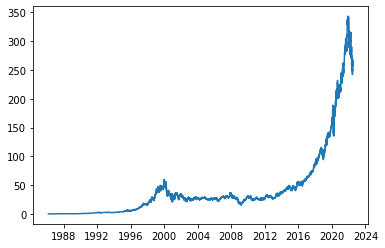

In [19]:
import matplotlib.pyplot as plt
plt.plot  (df.index, df['Close']) # index 與 Close 的圖


In [37]:
import numpy as np

#n係幾多日之前 
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [38]:
#變為NP array先可以放入去

def windowed_df_to_date_X_y(windowed_dataframe):
  #把數變為np
  df_as_np = windowed_dataframe.to_numpy()

  # 拿所有的column, 比返第一個column
  dates = df_as_np[:, 0]

  # 拿所有的column, 第一行[0]唔要, 由[1]開始一直去, 最後一行都唔要
  middle_matrix = df_as_np[:, 1:-1]
  # 第一維度是日子的長度,  第二維度是全個middle matrix, 第三維度是資料的類別數目, 我們只用close price, 所以是1
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  # 結果是Y, 是df的最後一行
  Y = df_as_np[:, -1]

  # 比返個 時間, 資料和結果出黎
  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

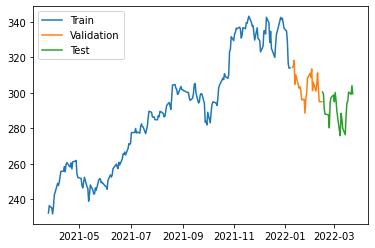

In [39]:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# 8成資料用作training
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
# 1成之料做validation test
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
# 1成資料做test
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


model = Sequential([layers.Input((3, 1)),# 3個資料去出一個結果
                    layers.LSTM(64), # 
                    layers.Dense(32, activation='relu'), 
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])#出一個結果

model.compile(loss='mse', # Mean squared error 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
# 
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
7/7 [==============================] - 3s 112ms/step - loss: 84558.8438 - mean_absolute_error: 289.0490 - val_loss: 92307.7578 - val_mean_absolute_error: 303.7347
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 84422.6875 - mean_absolute_error: 288.8119 - val_loss: 92178.6797 - val_mean_absolute_error: 303.5222
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 84294.1484 - mean_absolute_error: 288.5892 - val_loss: 92024.5938 - val_mean_absolute_error: 303.2682
Epoch 4/500
7/7 [==============================] - 0s 13ms/step - loss: 84128.1484 - mean_absolute_error: 288.3026 - val_loss: 91815.3203 - val_mean_absolute_error: 302.9230
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 83898.5312 - mean_absolute_error: 287.8997 - val_loss: 91508.5781 - val_mean_absolute_error: 302.4163
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 83587.0625 - mean_absolute_error: 287.3597 - val_loss: 91164.

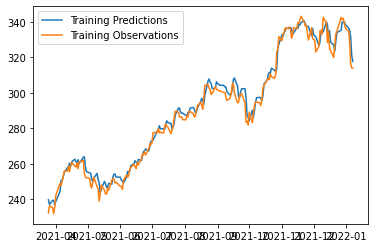

In [41]:
#呢個係個predition 出返個數
train_predictions = model.predict(X_train).flatten()

# train_
plt.plot(dates_train, train_predictions, )
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

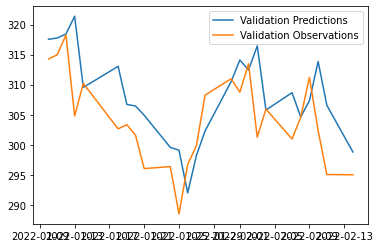

In [42]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

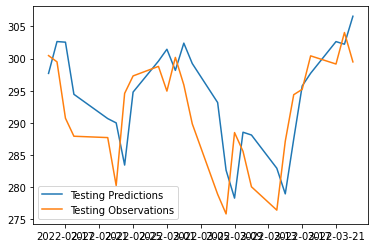

In [43]:
test_predictions = model.predict(X_test).flatten()

# test_
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

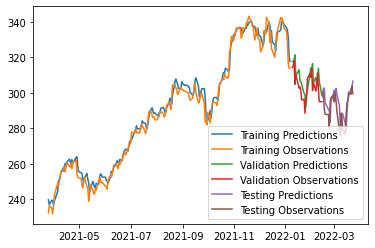

In [44]:
# 圖表plot出所有實際的價錢線與測驗線
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [45]:
from copy import deepcopy

# 呢個係可以估長線既, 但事實上係無乜用

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

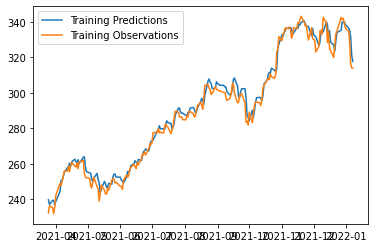

In [48]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 
            'Training Observations',
            ])


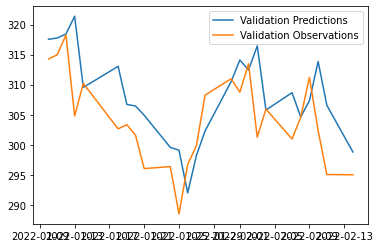

In [49]:

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend([
            'Validation Predictions', 
            'Validation Observations',
            ])


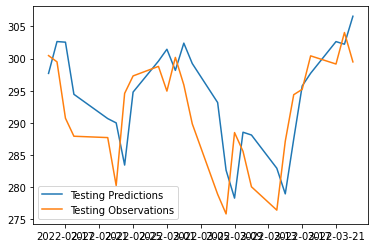

In [50]:

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend([
            'Testing Predictions', 
            'Testing Observations',
            ])


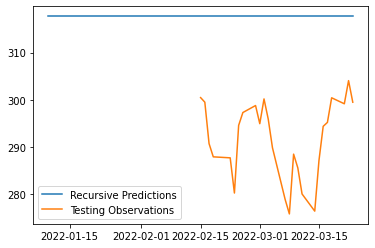

In [52]:

plt.plot(recursive_dates, recursive_predictions)
plt.plot(dates_test, y_test)
plt.legend([
            'Recursive Predictions',
             'Testing Observations'])

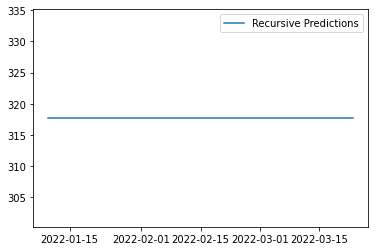

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])